<h2 style="text-align:center;font-weight:bold;font-size:24px;">Modelo de machine learning supervisado para clasificación binaria de demencia</h2>

<h2 style="text-align:center;font-weight:bold;font-size:24px;">Camilo A. Lyons Valero</h2>

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">RESUMEN</h3>

<div style="text-align: justify;">
El presente estudio utiliza un conjunto de datos multifacético para explorar y predecir la incidencia de demencia, un trastorno cognitivo devastador y crecientemente prevalente en la población mundial. El dataset comprende una amplia gama de variables que abarcan desde factores demográficos hasta indicadores de salud física y mental. Entre las variables incluidas se encuentran la presencia de diabetes, hábitos de consumo de alcohol, parámetros cardiovasculares como la frecuencia cardíaca y los niveles de oxígeno en la sangre, así como mediciones de temperatura corporal y peso. Factores genéticos, como la presencia del alelo APOE ε4, y antecedentes familiares de demencia también están presentes en el conjunto de datos. Además, se incluyen medidas de salud mental, como el estado de depresión, así como resultados de pruebas cognitivas y niveles de actividad física y calidad del sueño. Este conjunto de datos proporciona una oportunidad única para investigar las complejas interacciones entre factores genéticos, estilo de vida y salud física y mental en relación con la demencia. Los resultados de este estudio podrían tener importantes implicaciones clínicas y de salud pública al identificar factores de riesgo modificables y proporcionar información sobre la predicción y prevención de la demencia.
    </div>

<h3 style="text-align:center;font-weight:bold;">DEFINICIÓN DE VARIABLES</h3>


* **Diabetic (Binary):** Indica si a un paciente se le ha diagnosticado diabetes (1 para sí, 0 para no).
* **Alcohol Level (Continuous):** Mide el nivel de consumo de alcohol de los pacientes, posiblemente reflejando elecciones de estilo de vida.
* **Heart Rate (Continuous):** indica la cantidad de latidos del corazón por minuto, un indicador crítico de la salud cardiovascular.
* **Blood Oxygen Level (Continuous):** la saturación de oxígeno en la sangre, un signo vital de la función respiratoria.
* **Body Temperature (Continuous):** La temperatura corporal medida en grados Celsius, que indica posible fiebre o hipotermia.
* **Weight (Continuous):** La masa del paciente en kilogramos, medida fundamental de salud.
* **MRI Delay (Continuous):** el retraso en la obtención de una resonancia magnética, potencialmente indicativo de la progresión o gravedad de las afecciones médicas.
* **Prescription:** La medicación específica prescrita al paciente, relevante para el análisis del tratamiento.
* **Dosage in mg (Continuous):** a cantidad de medicamento recetado, fundamental para estudios de dosis-efecto.
* **Age (Continuous):** La edad del paciente, factor demográfico esencial.
* **Education_Level:** El nivel más alto de educación alcanzado por el paciente, que puede correlacionarse con los conocimientos sobre salud.
* **Dominant_Hand:** Indica la mano dominante del paciente, que podría estar relacionada con funciones neurológicas.
* **Gender:** El género del paciente, una característica demográfica clave.
* **Family_History:** Indica antecedentes familiares de demencia, un factor de riesgo significativo.
* **Smoking_Status:** Refleja los hábitos de fumar del paciente, un indicador importante del estilo de vida.
* **APOE_ε4:** Muestra la presencia del alelo APOE ε4, una variante genética asociada a la enfermedad de Alzheimer.
* **Physical_Activity:** El nivel de actividad física del paciente, destacando los impactos del estilo de vida en la salud.
* **Depression_Status:** Indica si el paciente tiene depresión, lo que puede estar relacionado con la salud cognitiva.
* **Cognitive_Test_Scores (Continuous):** Puntuaciones de pruebas cognitivas, medidas directas de la función cognitiva.
* **Medication_History:** Registra si el paciente tiene antecedentes de uso de medicamentos, relevantes para las interacciones entre medicamentos.
* **Nutrition_Diet:** Describe la dieta del paciente, un factor de salud importante.
* **Sleep_Quality:** Evalúa la calidad del sueño del paciente, un aspecto crítico para la salud.
* **Chronic_Health_Conditions:** Anota cualquier condición de salud crónica que tenga el paciente, clave para estudios de comorbilidad.
* **Dementia (Binary):** Sirve como variable objetivo, indicando la presencia (1) o ausencia (0) de demencia.



<h3 style="text-align:center;font-weight:bold;"><em>¿Cómo contribuye cada uno de estos factores a la demencia?</em></h3>
<h3 style="text-align:center;font-weight:bold;"><em>¿Que tanto podríamos predecir que una persona pueda llegar a sufrir esta enfermedad?</em></h3>
<h3 style="text-align:center;font-weight:bold;"><em>¿Podemos entonces modificar nuestros hábitos para reducir el riesgo de padecer demencia?</em></h3>

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">IMPORTACIÓN DE LIBRERÍAS</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

<h3 style="text-align:center;font-weight:bold;">LECTURA DE DATASET Y CARGA EN DATAFRAME</h3>

In [2]:
ruta_del_archivo = "https://raw.githubusercontent.com/clyonsv/Data.science-Camilo.Lyons/main/dementia_patients_health_data.csv"
df_dementia = pd.read_csv(ruta_del_archivo, sep=",")
df_dementia

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,NaN,1


In [3]:
df_dementia.shape

(1000, 24)

### Informacion de tipos de datos y cantidad de valores no nulos para cada variable

In [4]:
df_dementia.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [5]:
df_dementia.isna().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

Las variables __Prescription, Dosage y Chronic_Health_Conditions__ contienen valores nulos, principalmente debido a que no todos los pacientes en la muestra requieren medicación o presentan condiciones de salud adicionales. Es decir, el conjunto de datos incluye registros de individuos considerados "sanos".

### Estadisticas descriptivas - variables numéricas

In [6]:
df_dementia.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


### Variables categóricas y/o binarias

In [7]:
# Listado de registros que posee cada variable no numérica: 

columnas = list(df_dementia.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'la variable: {columna} - posee los siguientes registros:')
  print(list(df_dementia[f'{columna}'].value_counts().index))
  print('\n')

la variable: Prescription - posee los siguientes registros:
['Memantine', 'Galantamine', 'Rivastigmine', 'Donepezil']


la variable: Education_Level - posee los siguientes registros:
['Primary School', 'Secondary School', 'No School', 'Diploma/Degree']


la variable: Dominant_Hand - posee los siguientes registros:
['Left', 'Right']


la variable: Gender - posee los siguientes registros:
['Female', 'Male']


la variable: Family_History - posee los siguientes registros:
['Yes', 'No']


la variable: Smoking_Status - posee los siguientes registros:
['Former Smoker', 'Never Smoked', 'Current Smoker']


la variable: APOE_ε4 - posee los siguientes registros:
['Positive', 'Negative']


la variable: Physical_Activity - posee los siguientes registros:
['Mild Activity', 'Sedentary', 'Moderate Activity']


la variable: Depression_Status - posee los siguientes registros:
['No', 'Yes']


la variable: Medication_History - posee los siguientes registros:
['Yes', 'No']


la variable: Nutrition_Diet - p

### Variables categoricas a dummy

In [8]:
df_dementia2 = pd.get_dummies(df_dementia['Prescription'], prefix='Prescription', dtype=int)
df_dementia3 = pd.get_dummies(df_dementia['Education_Level'], prefix='Education', dtype=int)
df_dementia4 = pd.get_dummies(df_dementia['Dominant_Hand'], prefix='Dominant_Hand', dtype=int)
df_dementia5 = pd.get_dummies(df_dementia['Gender'], prefix='Gender', dtype=int)
df_dementia6 = pd.get_dummies(df_dementia['Family_History'], prefix='Family_History', dtype=int)
df_dementia7 = pd.get_dummies(df_dementia['Smoking_Status'], prefix='Smoking_Status', dtype=int)
df_dementia8 = pd.get_dummies(df_dementia['APOE_ε4'], prefix='APOE_ε4', dtype=int)
df_dementia9 = pd.get_dummies(df_dementia['Physical_Activity'], prefix='Physical_Activity', dtype=int)
df_dementia10 = pd.get_dummies(df_dementia['Depression_Status'], prefix='Depression_Status', dtype=int)
df_dementia11 = pd.get_dummies(df_dementia['Medication_History'], prefix='Medication_History', dtype=int)
df_dementia12 = pd.get_dummies(df_dementia['Nutrition_Diet'], prefix='Nutrition_Diet', dtype=int)
df_dementia13 = pd.get_dummies(df_dementia['Sleep_Quality'], prefix='Sleep_Quality', dtype=int)
df_dementia14 = pd.get_dummies(df_dementia['Chronic_Health_Conditions'], prefix='Condition', dtype=int)


df_resultado = pd.concat([df_dementia.drop(['Prescription','Education_Level', 'Dominant_Hand', 'Gender', 'Family_History' , 'Smoking_Status' , 'APOE_ε4' , 'Physical_Activity' , 'Depression_Status' , 'Medication_History' , 'Nutrition_Diet' , 'Sleep_Quality' , 'Chronic_Health_Conditions'], axis=1), df_dementia2, df_dementia3, df_dementia4, df_dementia5, df_dementia6, df_dementia7, df_dementia8, df_dementia9, df_dementia10, df_dementia11, df_dementia12, df_dementia13, df_dementia14], axis=1)

df_resultado

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,...,Medication_History_No,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Condition_Diabetes,Condition_Heart Disease,Condition_Hypertension
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,60,10,...,1,0,0,1,0,0,1,1,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,12.0,61,1,...,0,1,0,1,0,0,1,0,1,0
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,69,8,...,1,0,0,0,1,0,1,0,1,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,23.0,78,5,...,0,1,1,0,0,0,1,0,0,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,20.0,77,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,10.0,88,5,...,1,0,1,0,0,0,1,1,0,0
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,80,9,...,0,1,0,1,0,0,1,1,0,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,67,8,...,0,1,1,0,0,1,0,1,0,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,20.0,62,2,...,1,0,0,1,0,1,0,0,0,0


In [9]:
df_resultado.shape

(1000, 45)

### Matriz de correlación - variables numéricas

In [10]:
columns_to_exclude = ['Diabetic', 'Dementia']
df_numeric = df_dementia.select_dtypes(include=['number']).drop(columns=columns_to_exclude)
correlation_matrix = df_numeric.corr()

# No se tienen en cuenta variables categoricas y binarias 


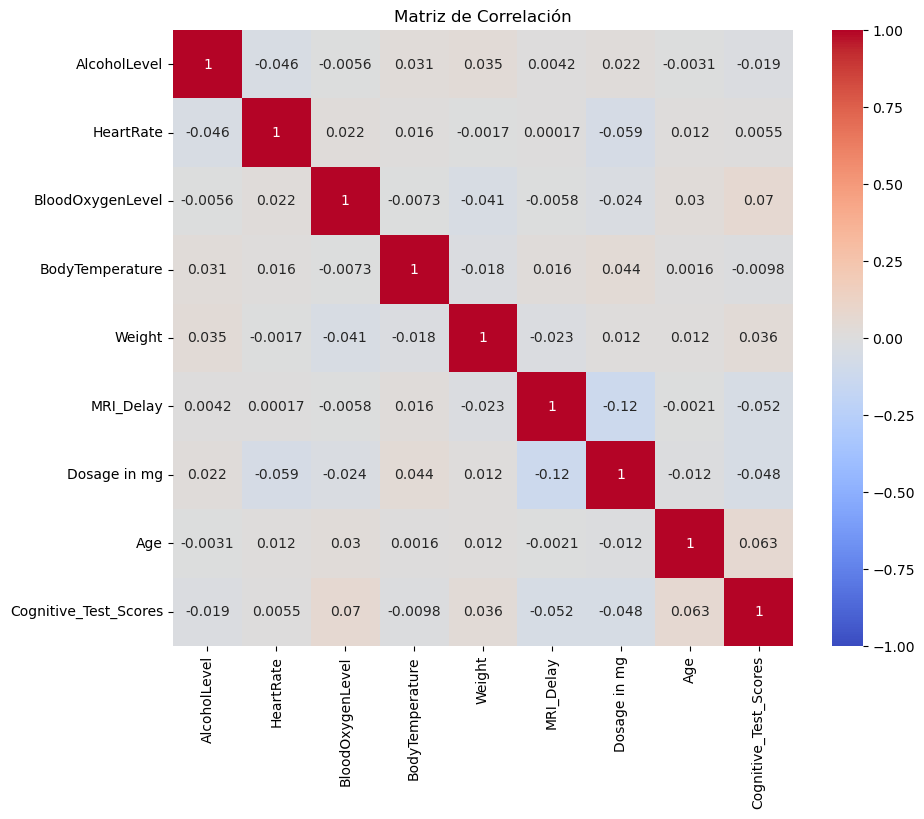

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### Matriz de correlación - todas las variables

#### Aca se incluye tambien las variables categóricas, transformadas a binarias (1 y 0)

In [12]:
correlation_matrix2 = df_resultado.corr()

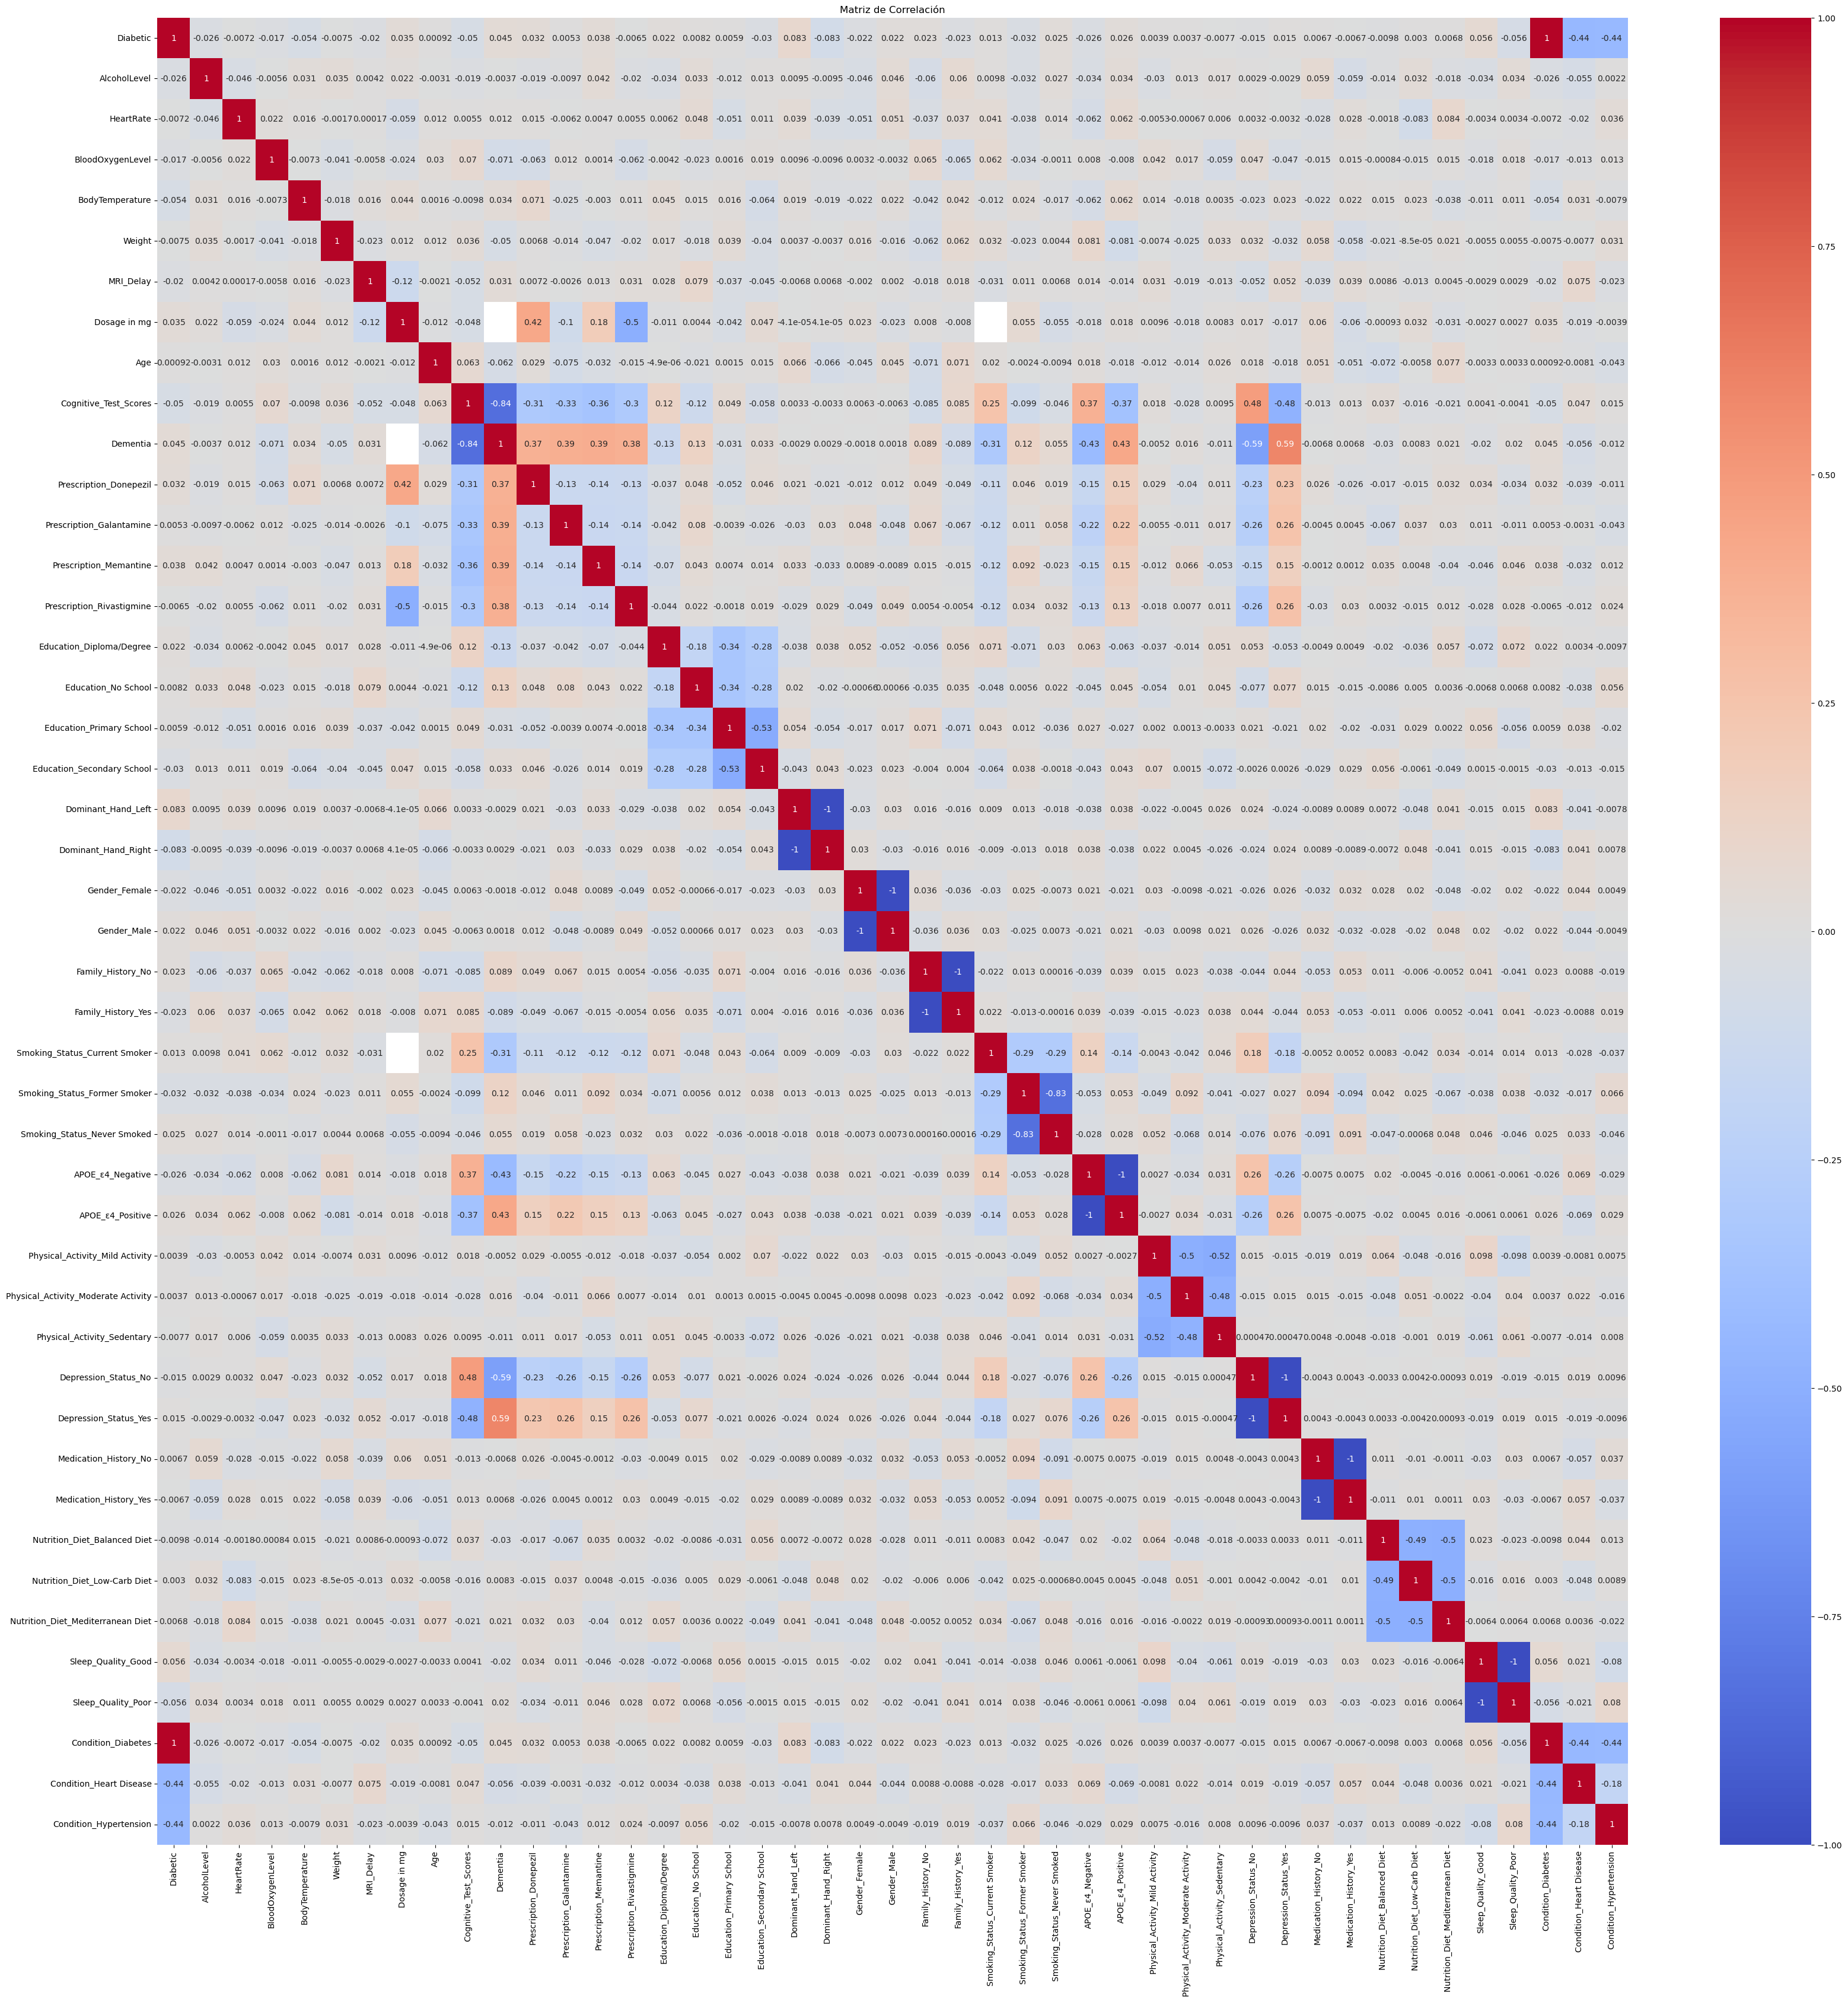

In [13]:
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

___Correlación no implica causalidad___

En la matriz de correlación anterior, es posible observar que las variables: __Cognitive test score, APOE_ε4 y Depression status__ son las que mayor relación estan teniendo sobre la demencia. Es decir, poseen una muy fuerte correlación en comparación a las demas variables. 
* Cognitive test score - correlación inversa o negativa. __-0.84__
* APOE_ε4 - correlación directa o positiva. __0.43__
* Depression status - correlación directa o positiva.  __0.59__

Sin embargo, la correlación no entrega información sobre causa-efecto entre las variables. Por lo cual seria incorrecto afirmar que estas variables son las principales causantes de demencia, ya que pueden existir factores externos que estan afectando a cada una de ellas. 



**____________________________________________________________________________________________________________________________**

<h2 style="text-align:center;font-weight:bold;">ANÁLISIS EXPLORATORIO</h2>

--------------------------------------------------------------------------------------------------------------------------------

<h3 style="text-align:center;font-weight:bold;">DETERIORO COGNITIVO</h3>

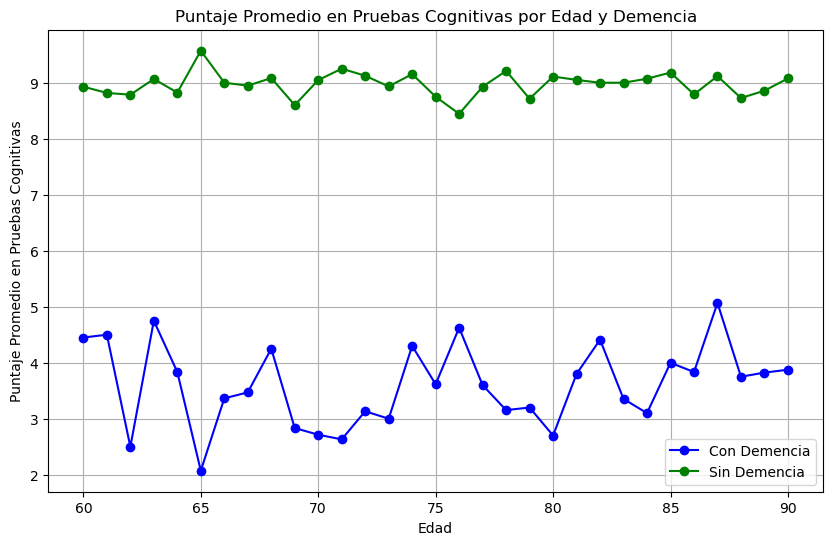

In [14]:
con_demencia = df_dementia[df_dementia['Dementia'] == 1]
sin_demencia = df_dementia[df_dementia['Dementia'] == 0]

# Calcular el puntaje promedio de las pruebas cognitivas para cada grupo de edad 
puntaje_promedio_edad_con_demencia = con_demencia.groupby('Age')['Cognitive_Test_Scores'].mean()
puntaje_promedio_edad_sin_demencia = sin_demencia.groupby('Age')['Cognitive_Test_Scores'].mean()

plt.figure(figsize=(10, 6))  

# Gráfico de líneas para personas con demencia
plt.plot(puntaje_promedio_edad_con_demencia.index, puntaje_promedio_edad_con_demencia.values, label='Con Demencia', marker='o', color='blue')

# Gráfico de líneas para personas sin demencia
plt.plot(puntaje_promedio_edad_sin_demencia.index, puntaje_promedio_edad_sin_demencia.values, label='Sin Demencia', marker='o', color='green')

plt.title('Puntaje Promedio en Pruebas Cognitivas por Edad y Demencia')  
plt.xlabel('Edad')  # Etiqueta del eje x
plt.ylabel('Puntaje Promedio en Pruebas Cognitivas')  
plt.legend()  
plt.grid(True)  
plt.show()

<div style="text-align: justify;"> 
La marcada disparidad en los puntajes promedio de las pruebas cognitivas entre individuos sanos y aquellos con demencia sugiere un deterioro cognitivo significativo en la población afectada por la enfermedad. La curva de individuos con demencia, con puntajes máximos raramente superiores a 5, refleja este declive, mientras que la curva de individuos sanos presenta puntajes más consistentemente altos, varía entre 8 y 9 puntos.
</div>

<div style="text-align: justify;"> 
Este fenómeno indica una disminución notable en las capacidades cognitivas asociadas con la demencia, sugiriendo una diferencia fundamental en la función cerebral entre los dos grupos. 
    </div>

___Diversidad en Puntajes Cognitivos y Demencia: Consideraciones sobre la Manifestación a lo Largo de la Vida___

<div style="text-align: justify;"> 
La variabilidad significativa en los puntajes promedio de las pruebas cognitivas en la curva de individuos con demencia (azul), independientemente de la edad, <b>plantea la posibilidad de que el deterioro cognitivo pueda manifestarse por igual en cualquier etapa de la vida</b>, ya sea si la enfermedad surge en edades tempranas o tardías. Este hallazgo subraya la necesidad de investigaciones adicionales para comprender mejor los factores subyacentes que contribuyen al inicio y la progresión de la demencia.
    </div>

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">CARACTERÍSTICAS DEMOGRÁFICAS</h3>

___Relación entre el Nivel Educativo y la Prevalencia de Demencia: Un Análisis Inicial___

Para iniciar nuestro análisis, es crucial explorar las características demográficas de nuestra población de estudio. Esto implica examinar el nivel educativo de los pacientes, tanto sanos como aquejados por la enfermedad, así como también su dominancia manual y la distribución de género dentro de la muestra.

<Figure size 700x300 with 0 Axes>

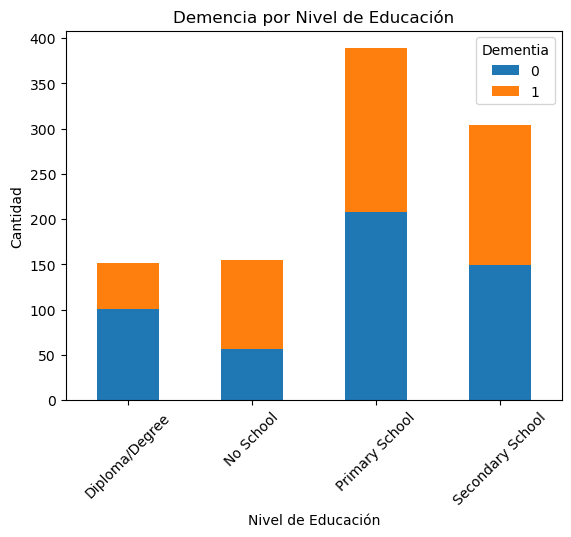

In [15]:
conteo_dementia_educacion = df_dementia.groupby(['Education_Level', 'Dementia']).size().unstack()

plt.figure(figsize=(7, 3))  
conteo_dementia_educacion.plot(kind='bar', stacked=True)  
plt.xlabel('Nivel de Educación')  
plt.ylabel('Cantidad') 
plt.title('Demencia por Nivel de Educación')  
plt.xticks(rotation=45) 

plt.show()


<div style="text-align: justify;"> 
El análisis a través del diagrama de barras revela una relación notable: a medida que aumenta el nivel educativo, observamos una marcada disminución en la incidencia de demencia. Este hallazgo sugiere una asociación inversa entre el nivel educativo y la prevalencia de la enfermedad de Alzheimer en nuestra muestra. Este descubrimiento resalta la importancia del factor educativo en la salud cognitiva.
    </div>

**____________________________________________________________________________________________________________________________**

___Tendencias de genero en la demencia y la depresión___

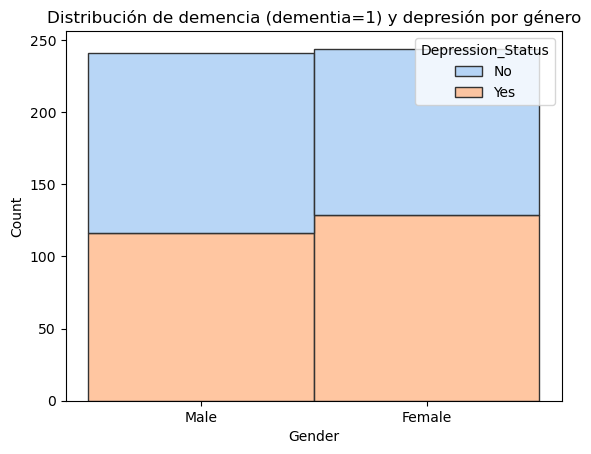

In [16]:
# Filtrar los datos para casos con demencia = 1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

sns.histplot(data=df_dementia_1, x="Gender", hue="Depression_Status", multiple="stack", palette="pastel", edgecolor="0.2")

plt.title('Distribución de demencia (dementia=1) y depresión por género')
plt.show()


___¿La demencia es mas común en hombres o mujeres? ¿Que se puede concluir respecto a la depresión?___

Con base en el diagrama de barras anterior, podemos concluir que el conjunto de datos muestra una distribución equitativa entre hombres y mujeres con demencia. Además, observamos una diferencia no muy pronunciada en los niveles de depresión entre ambos géneros, siendo ligeramente mayor en las mujeres. Por lo cual, para este conjunto de datos, tanto la demencia como la depresión esta afectando aproximadamente igual a hombres y mujeres. 

**____________________________________________________________________________________________________________________________**

___¿Existe mayor prevalencia de una mano en pacientes con demencia?___

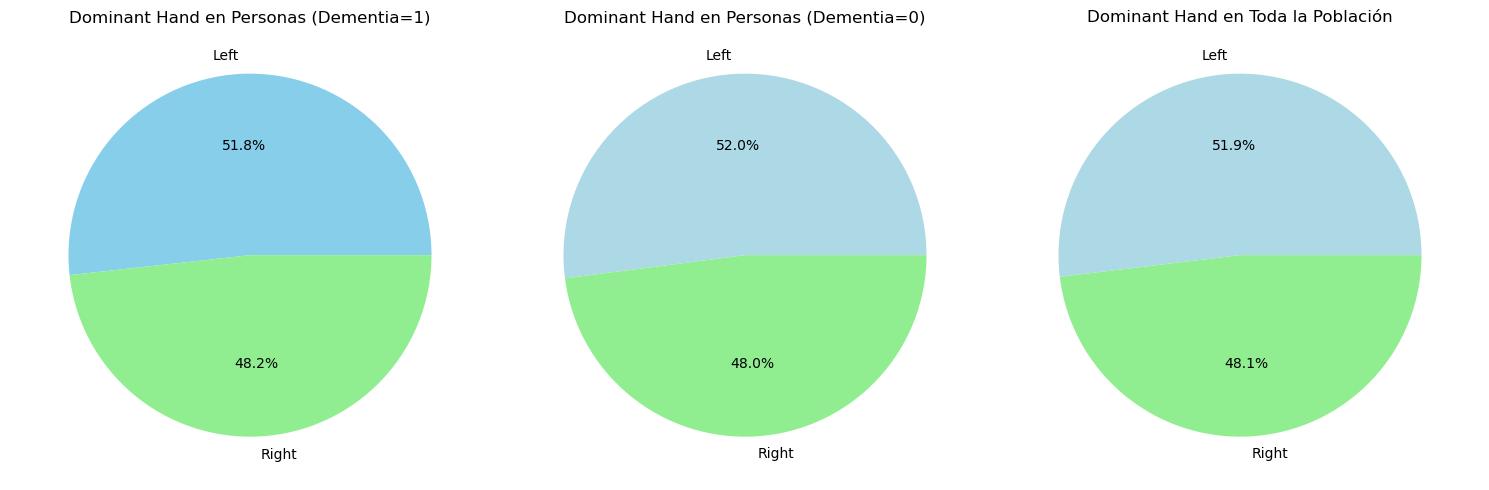

In [17]:
# Filtramos los datos
df_dementia_0 = df_dementia[df_dementia['Dementia'] == 0]
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

# Contar la cantidad de casos por dominant hand en toda la población
conteo_dominant_hand_total = df_dementia['Dominant_Hand'].value_counts()

# Contar la cantidad de casos por dominant hand en personas con dementia=0 y dementia=1
conteo_dominant_hand_dementia_0 = df_dementia_0['Dominant_Hand'].value_counts()
conteo_dominant_hand = df_dementia_1['Dominant_Hand'].value_counts()

plt.figure(figsize=(15, 5))

# Gráfico de torta para casos con dementia=1
plt.subplot(1, 3, 1)
plt.pie(conteo_dominant_hand, labels=conteo_dominant_hand.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Dominant Hand en Personas (Dementia=1)')
plt.axis('equal')  # Para que el gráfico de torta sea circular

# Gráfico de torta para casos con dementia=0
plt.subplot(1, 3, 2)
plt.pie(conteo_dominant_hand_dementia_0, labels=conteo_dominant_hand_dementia_0.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Dominant Hand en Personas (Dementia=0)')
plt.axis('equal')  # Para que el gráfico de torta sea circular

# Gráfico de torta para toda la población
plt.subplot(1, 3, 3)
plt.pie(conteo_dominant_hand_total, labels=conteo_dominant_hand_total.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Dominant Hand en Toda la Población')
plt.axis('equal') 

plt.tight_layout() 
plt.show()


Con base en los anteriores diagramas circulares, tanto para indivios sanos como con demencia, existe una proporsion similar y no tan significativa (4%) entre la prevalencia de la mano izquierda vs la derecha. Por lo cual, __para la poblacion de este estudio__, la dominancia de la mano puede ser un aspecto NO concluyente a niveles generales.

___Sin embargo...___

***"Algunos investigadores han especulado que la dominancia de la mano izquierda es más frecuente entre los pacientes que padecen demencia del tipo Alzheimer que comenzó antes de los 65 años. y que, en esos pacientes, la enfermedad sigue un curso más rápido."***

El objetivo es analizar en 3 rangos de edades a los 2 grupos: individuos con demencia (dementia=1) y sin ella (dementia=0), con la finalidad de comprobar la anterior hipotesis. 

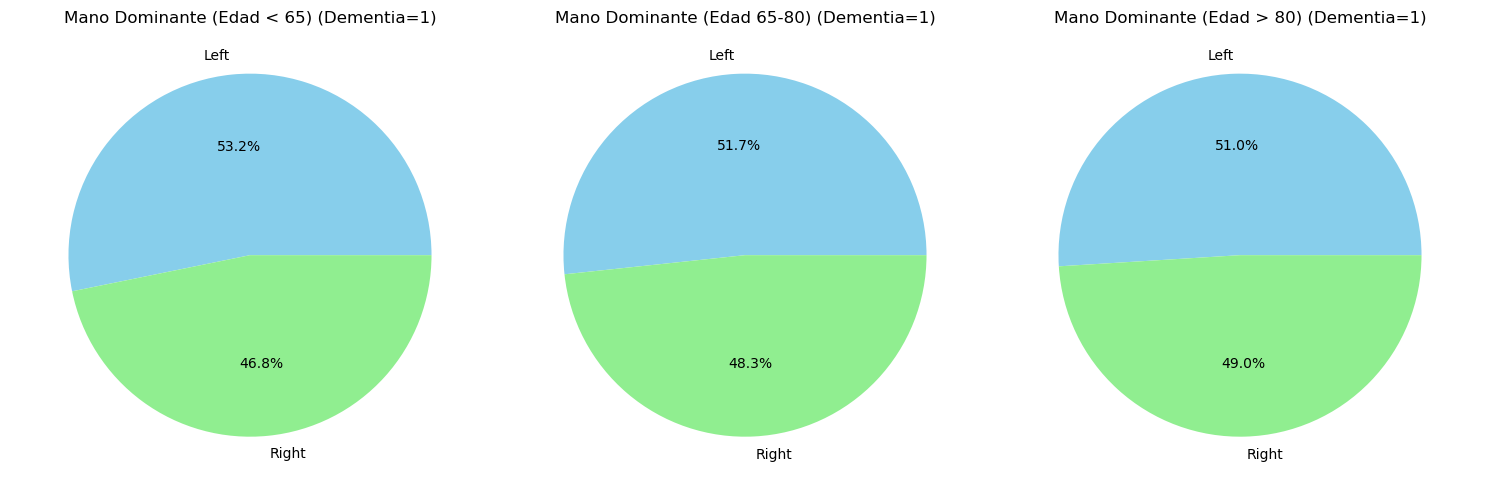

In [18]:
# Filtrar el DataFrame para incluir solo casos con dementia=1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

# Dividimos los datos en grupos de edad
df_dementia_1_age_lt_65 = df_dementia_1[df_dementia_1['Age'] < 65]
df_dementia_1_age_65_80 = df_dementia_1[(df_dementia_1['Age'] >= 65) & (df_dementia_1['Age'] <= 80)]
df_dementia_1_age_gt_80 = df_dementia_1[df_dementia_1['Age'] > 80]

# Función para crear un diagrama de pastel para una característica específica
def plot_pie_chart(data, feature, title, position):
    plt.subplot(1, 3, position)
    plt.pie(data[feature].value_counts(), labels=data[feature].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(title)
    plt.axis('equal')

# diagramas para cada grupo de edad
plt.figure(figsize=(15, 5))
plot_pie_chart(df_dementia_1_age_lt_65, 'Dominant_Hand', 'Mano Dominante (Edad < 65) (Dementia=1)', 1)
plot_pie_chart(df_dementia_1_age_65_80, 'Dominant_Hand', 'Mano Dominante (Edad 65-80) (Dementia=1)', 2)
plot_pie_chart(df_dementia_1_age_gt_80, 'Dominant_Hand', 'Mano Dominante (Edad > 80) (Dementia=1)', 3)

plt.tight_layout()
plt.show()

__GRUPO N.1__

--------------------------------------------------------------------------------------------------------------------------------

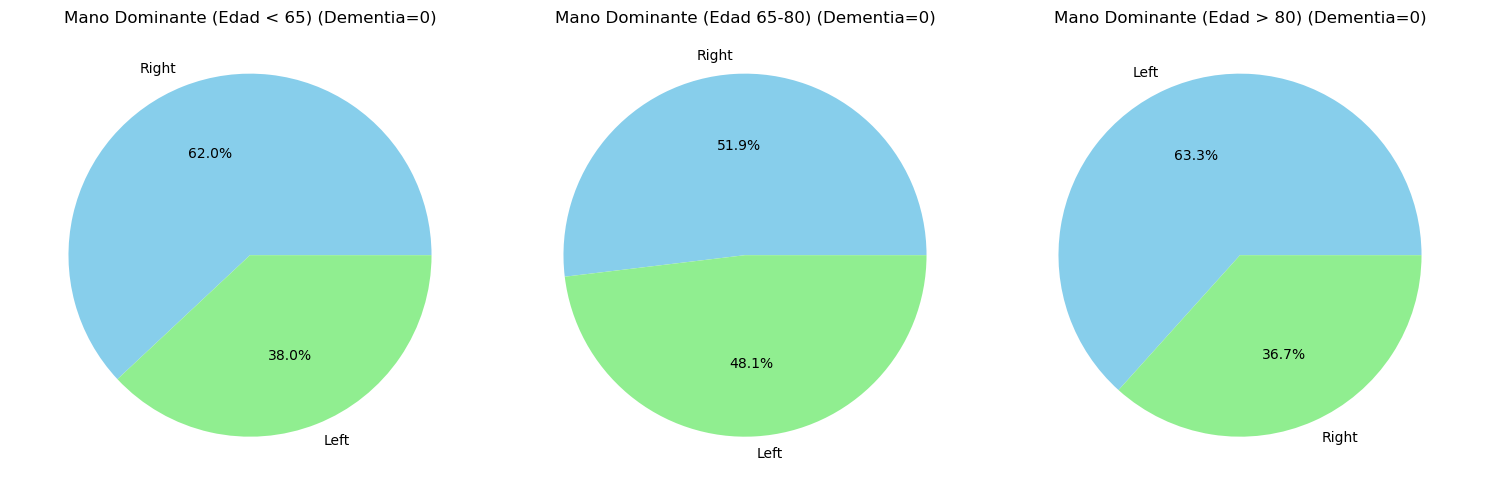

In [19]:
# Filtrar el DataFrame para incluir solo casos con dementia=1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 0]

# Dividir los datos en tres grupos según el rango de edad
df_dementia_1_age_lt_65 = df_dementia_1[df_dementia_1['Age'] < 65]
df_dementia_1_age_65_80 = df_dementia_1[(df_dementia_1['Age'] >= 65) & (df_dementia_1['Age'] <= 80)]
df_dementia_1_age_gt_80 = df_dementia_1[df_dementia_1['Age'] > 80]

# Función para crear un diagrama de pastel para una característica específica
def plot_pie_chart(data, feature, title, position):
    plt.subplot(1, 3, position)
    plt.pie(data[feature].value_counts(), labels=data[feature].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(title)
    plt.axis('equal')

# Diagramas para cada grupo de edad
plt.figure(figsize=(15, 5))
plot_pie_chart(df_dementia_1_age_lt_65, 'Dominant_Hand', 'Mano Dominante (Edad < 65) (Dementia=0)', 1)
plot_pie_chart(df_dementia_1_age_65_80, 'Dominant_Hand', 'Mano Dominante (Edad 65-80) (Dementia=0)', 2)
plot_pie_chart(df_dementia_1_age_gt_80, 'Dominant_Hand', 'Mano Dominante (Edad > 80) (Dementia=0)', 3)

plt.tight_layout()
plt.show()

__GRUPO N.2__

--------------------------------------------------------------------------------------------------------------------------------

<div style="text-align: justify;"> 
Para el primer grupo, que comprende individuos con demencia (dementia=1), se observa que a medida que la edad se aproxima a los 65 años, <b>la prevalencia de la mano izquierda tiende a aumentar ligeramente</b>. Esta tendencia se hace aún más evidente al compararla con el segundo grupo en el mismo rango de edad (<65 años). En este segundo grupo, se nota una marcada predominancia de la mano derecha sobre la izquierda, a diferencia del primer grupo.
</div>

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">INDICADORES FISIOLÓGICOS</h3>

<div style="text-align: justify;"> 
Con el propósito de identificar diferencias entre individuos saludables y aquejados por demencia, y de detectar posibles valores outliers o valores atipicos en los datos que puedan distorsionar futuras predicciones, se procede a analizar mediante boxplots diversos parámetros biométricos de los pacientes. Estos incluyen el nivel de alcohol en sangre, la frecuencia cardíaca, el índice de oxígeno en la sangre y la temperatura corporal.
    </div>

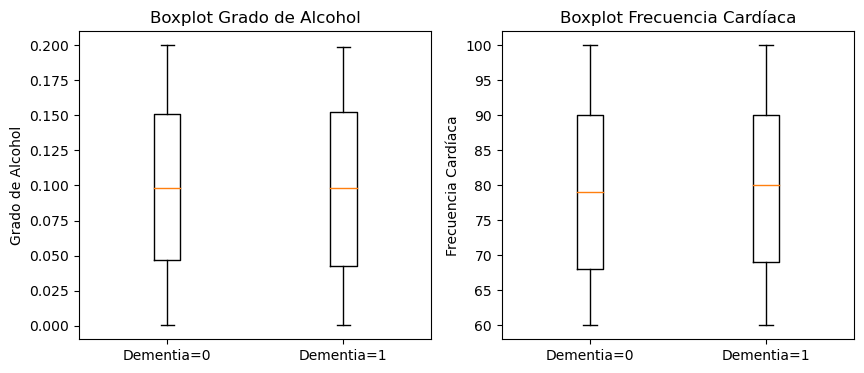

In [20]:
# Filtrar los datos para dementia=0 y dementia=1
df_dementia_0 = df_dementia[df_dementia['Dementia'] == 0]
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot para grado de alcohol
axs[0].boxplot([df_dementia_0['AlcoholLevel'], df_dementia_1['AlcoholLevel']], labels=['Dementia=0', 'Dementia=1'])
axs[0].set_title('Boxplot Grado de Alcohol')
axs[0].set_ylabel('Grado de Alcohol')

# Boxplot para frecuencia cardíaca
axs[1].boxplot([df_dementia_0['HeartRate'], df_dementia_1['HeartRate']], labels=['Dementia=0', 'Dementia=1'])
axs[1].set_title('Boxplot Frecuencia Cardíaca')
axs[1].set_ylabel('Frecuencia Cardíaca')

# Mostrar el gráfico
plt.show()


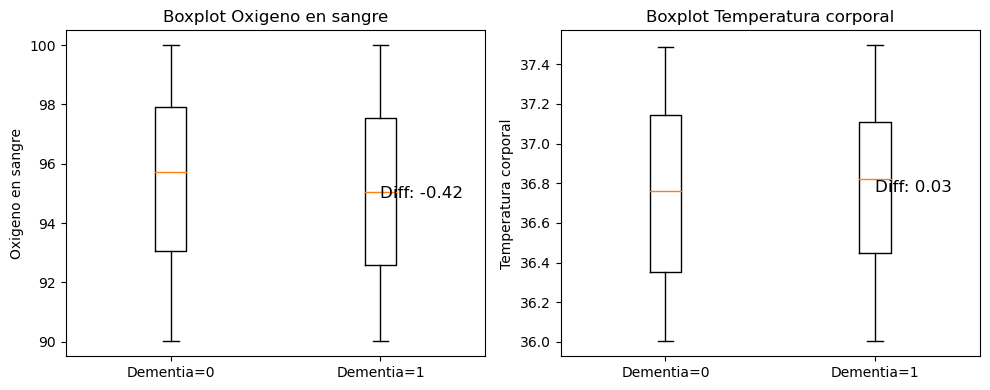

In [21]:
# Filtramos los datos para dementia=0 y dementia=1
df_dementia_0 = df_dementia[df_dementia['Dementia'] == 0]
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

# Calcular la diferencia de medias para BloodOxygenLevel
mean_difference_oxygen = np.mean(df_dementia_1['BloodOxygenLevel']) - np.mean(df_dementia_0['BloodOxygenLevel'])

# Calcular la diferencia de medias para BodyTemperature
mean_difference_temperature = np.mean(df_dementia_1['BodyTemperature']) - np.mean(df_dementia_0['BodyTemperature'])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot para grado de alcohol
axs[0].boxplot([df_dementia_0['BloodOxygenLevel'], df_dementia_1['BloodOxygenLevel']], labels=['Dementia=0', 'Dementia=1'])
axs[0].set_title('Boxplot Oxigeno en sangre')
axs[0].set_ylabel('Oxigeno en sangre')

# Mostrar la diferencia de medias en el primer gráfico
axs[0].text(2, np.mean(df_dementia_1['BloodOxygenLevel']), f'Diff: {mean_difference_oxygen:.2f}', fontsize=12, va='center')

# Boxplot para frecuencia cardíaca
axs[1].boxplot([df_dementia_0['BodyTemperature'], df_dementia_1['BodyTemperature']], labels=['Dementia=0', 'Dementia=1'])
axs[1].set_title('Boxplot Temperatura corporal')
axs[1].set_ylabel('Temperatura corporal')

# Mostrar la diferencia de medias en el segundo gráfico
axs[1].text(2, np.mean(df_dementia_1['BodyTemperature']), f'Diff: {mean_difference_temperature:.2f}', fontsize=12, va='center')

plt.tight_layout()
plt.show()


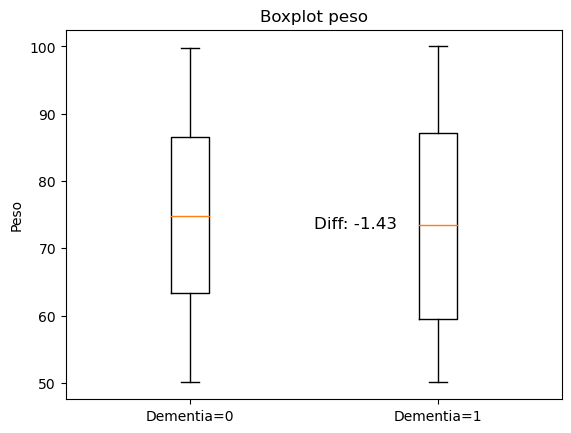

In [22]:
# Calcular la diferencia entre las medias de los grupos
mean_difference = np.mean(df_dementia_1['Weight']) - np.mean(df_dementia_0['Weight'])

# Boxplot para Weight
plt.boxplot([df_dementia_0['Weight'], df_dementia_1['Weight']], labels=['Dementia=0', 'Dementia=1'])

# Mostramos la diferencia de medias en el gráfico
plt.text(1.5, np.mean(df_dementia_1['Weight']), f'Diff: {mean_difference:.2f}', fontsize=12, va='center')

plt.title('Boxplot peso')
plt.ylabel('Peso')
plt.show()


<div style="text-align: justify;"> 
No se identificaron valores atípicos dentro de este conjunto de datos. En cuanto a las disparidades entre los dos grupos de individuos, las mayores diferencias se observaron en los parámetros biométricos del nivel de oxígeno en sangre y el peso. En promedio, ambos fueron menores en los individuos con demencia.
</div>

<div style="text-align: justify;"> 
Esto podría sugerir un deterioro en la salud general de los individuos con demencia. Lo cual podria estar relacionado con una serie de factores, como el envejecimiento del organismo o cambios en el metabolismo, que podrían contribuir al desarrollo o la progresión de la demencia.
    </div>

--------------------------------------------------------------------------------------------------------------------------------

___Persistencia de Enfermedades Crónicas en pacientes con demencia a lo largo de diversos grupos de edad___

<div style="text-align: justify;"> 
El propósito de este análisis es identificar las enfermedades predominantes en el grupo de pacientes con demencia y examinar si su distribución varía según la edad. Para lograr esto, se segmenta la población con demencia (dementia=1) en diferentes grupos de edad, contabilizando y apilando las barras según el número de individuos con enfermedades crónicas en cada rango de edad. Este enfoque nos permite visualizar a través de un histograma, cómo las enfermedades crónicas están distribuidas entre los pacientes con demencia en función de su edad.
    </div>

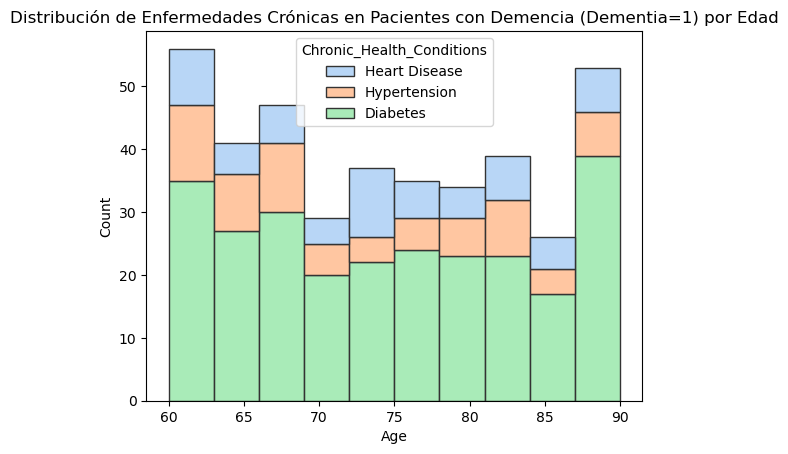

In [23]:
# Filtrar los datos para casos con demencia = 1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

sns.histplot(data=df_dementia_1, x="Age", hue="Chronic_Health_Conditions", multiple="stack", palette="pastel", edgecolor="0.2")

plt.title('Distribución de Enfermedades Crónicas en Pacientes con Demencia (Dementia=1) por Edad')

plt.show()

<div style="text-align: justify;"> 
Los hallazgos revelan una <b>prevalencia constante de la diabetes</b> por encima de otras condiciones médicas en individuos con demencia (dementia=1), independientemente del rango de edad. Esta persistente asociación entre la demencia y la diabetes sugiere una posible interacción patofisiológica entre ambas condiciones a lo largo de las diversas etapas de la vida.
    </div>

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">FACTOR HEREDITARIO</h3>

Se tiene la siguiente __Hipótesis__: Si bien existe una asociación genética entre la demencia Alzheimer y la herencia de ciertos genes relacionados, se postula que factores adicionales, como el estilo de vida, la salud mental y otros factores ambientales, pueden modular la expresión fenotípica de la enfermedad. Por lo tanto, se sugiere que algunos individuos con predisposición genética a la demencia Alzheimer __pueden permanecer libres de la enfermedad__ debido a la interacción de estos factores con la expresión génica y la patogénesis de la enfermedad.

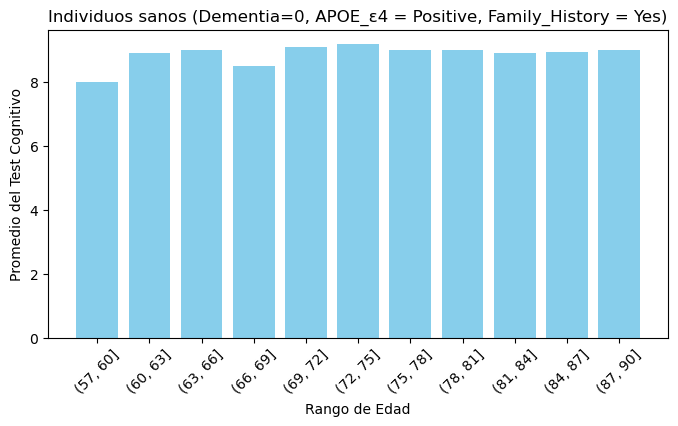

In [24]:
# Filtros
df_dementia_0_depression_yes = df_dementia[(df_dementia['Dementia'] == 0) & (df_dementia['APOE_ε4'] == 'Positive')  & (df_dementia['Family_History'] == 'Yes')]

# Definir rangos de edad con bins
bins = [i for i in range(0, 101, 3)]  # Crear bins de tamaño 10

# Agrupar por rango de edad y calcular el promedio del test cognitivo
promedio_por_edad_dementia_0_depression_yes = df_dementia_0_depression_yes.groupby(pd.cut(df_dementia_0_depression_yes['Age'], bins=bins))['Cognitive_Test_Scores'].mean()

plt.figure(figsize=(8, 4))
plt.bar(promedio_por_edad_dementia_0_depression_yes.index.astype(str), promedio_por_edad_dementia_0_depression_yes.values, color='skyblue')
plt.title('Individuos sanos (Dementia=0, APOE_ε4 = Positive, Family_History = Yes)')
plt.xlabel('Rango de Edad')
plt.ylabel('Promedio del Test Cognitivo')
plt.xticks(rotation=45)
plt.show()

<p style="text-align: justify;">
El histograma anterior representa únicamente a personas sanas (dementia=0) pero con antecedentes familiares y/o poseedores del gen APOE_ε4. El propósito es verificar si dentro de este grupo de personas sanas con antecedentes, existe un deterioro cognitivo relacionado con la edad. Los resultados muestran que, independientemente de si la persona es mayor o menor, están presentando pruebas cognitivas muy similares. Esto sugiere la posibilidad de que algunas personas, a pesar de tener un mayor riesgo genético, <b>nunca llegan a desarrollar la enfermedad.</b>
</p>


___¿Cuál podría ser el motivo de esto? ¿Hábitos saludables? ¿Ausencia de adicciones? ¿Una salud mental estable?___ Estos hallazgos plantean preguntas interesantes sobre los factores protectores que podrían estar en juego y que podrían contrarrestar los efectos de los factores de riesgo genético y familiar.

___Punto crítico en individuos sanos___

<div style="text-align: justify;"> 
Se observa que el intervalo de edad de 57 a 60 años presenta resultados ligeramente inferiores al resto de grupos. Esta discrepancia sugiere que en este rango de edad, exite mayor cantidad de pacientes que estan presentando un deterioro cognitivo, haciendo que la media tienda a bajar. Es decir, existe la posibilidad de que en este rango de edad se defina si estos individuos van a tener (o no) la enfermedad. 
</div>

Este hallazgo resalta un posible punto crítico en el proceso de desarrollo de la demencia, donde la influencia de los antecedentes puede volverse más pronunciada. __Identificar este rango de edad específico nos proporciona una ventana de oportunidad__ para intervenir y proporcionar medidas preventivas o de apoyo a aquellos individuos en mayor riesgo.

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">HÁBITOS: ACTIVIDAD FÍSICA, DIETA Y CALIDAD DE SUEÑO</h3>

El propósito de esta sección radica en investigar el impacto de los hábitos en el desarrollo de la enfermedad, partiendo de la __hipótesis__ que postula su relevancia en la predisposición a la misma. Con tal fin, se examina inicialmente el grupo de individuos afectados por demencia (dementia=1), distinguiéndolos entre aquellos con patrones de vida saludables y aquellos con prácticas menos favorables."

In [25]:
# Filtros
pacientes_demencia = df_dementia[df_dementia['Dementia'] == 1]

grupo_1 = pacientes_demencia[
    (pacientes_demencia['Physical_Activity'] == 'Sedentary') &
    (pacientes_demencia['Nutrition_Diet'] == 'Low-Carb Diet') &
    (pacientes_demencia['Sleep_Quality'] == 'Poor')
]

grupo_2 = pacientes_demencia[
    (pacientes_demencia['Physical_Activity'] == 'Moderate Activity') &
    (pacientes_demencia['Nutrition_Diet'] == 'Balanced Diet') &
    (pacientes_demencia['Sleep_Quality'] == 'Good')
]

# Contamos cuantas personas hay en cada grupo
conteo_grupo_1 = len(grupo_1)
conteo_grupo_2 = len(grupo_2)

print("Número de personas en el Grupo 1:", conteo_grupo_1)
print("Número de personas en el Grupo 2:", conteo_grupo_2)

Número de personas en el Grupo 1: 39
Número de personas en el Grupo 2: 19


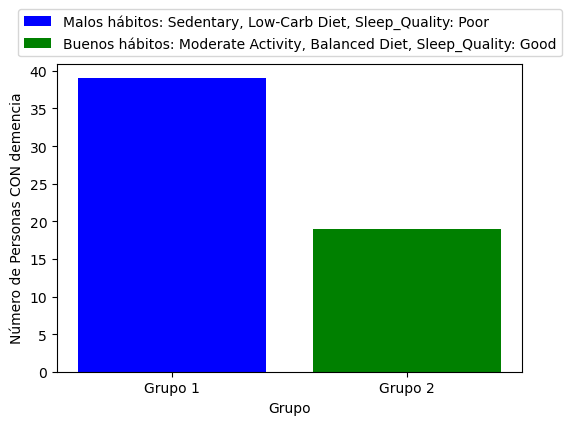

In [26]:
categorias = ['Grupo 1', 'Grupo 2']

valores = [conteo_grupo_1, conteo_grupo_2]

plt.figure(figsize=(6, 4))
bars = plt.bar(categorias, valores, color=['blue', 'green'])

descripciones = ['Malos hábitos: Sedentary, Low-Carb Diet, Sleep_Quality: Poor',
                 'Buenos hábitos: Moderate Activity, Balanced Diet, Sleep_Quality: Good']
plt.legend(bars, descripciones, loc='upper right', bbox_to_anchor=(1.1, 1.2))

plt.xlabel('Grupo')
plt.ylabel('Número de Personas CON demencia')
plt.show()

___Incidencia de Malos Hábitos y Demencia: Evaluación mediante Diagramas de Barras___

El diagrama de barras anterior revela una relación de 2 a 1 entre los individuos con demencia y buenos hábitos en comparación con aquellos con malos hábitos. Este hallazgo sugiere que hay una mayor propensión a la presencia de malos hábitos y demencia simultáneamente, __planteando la posibilidad de que estos factores estén interconectados y puedan influir en el desarrollo de la enfermedad.__

In [27]:
pacientes_demencia = df_dementia[df_dementia['Dementia'] == 0]

grupo_3 = pacientes_demencia[
    (pacientes_demencia['Physical_Activity'] == 'Sedentary') &
    (pacientes_demencia['Nutrition_Diet'] == 'Low-Carb Diet') &
    (pacientes_demencia['Sleep_Quality'] == 'Poor')
]

grupo_4 = pacientes_demencia[
    (pacientes_demencia['Physical_Activity'] == 'Moderate Activity') &
    (pacientes_demencia['Nutrition_Diet'] == 'Balanced Diet') &
    (pacientes_demencia['Sleep_Quality'] == 'Good')
]

conteo_grupo_3 = len(grupo_3)
conteo_grupo_4 = len(grupo_4)

print("Número de personas en el Grupo 1:", conteo_grupo_3)
print("Número de personas en el Grupo 2:", conteo_grupo_4)

Número de personas en el Grupo 1: 26
Número de personas en el Grupo 2: 23


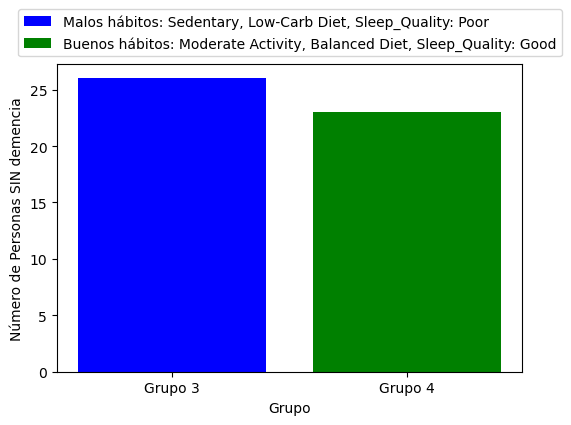

In [28]:
categorias = ['Grupo 3', 'Grupo 4']

valores = [conteo_grupo_3, conteo_grupo_4]

plt.figure(figsize=(6, 4))
bars = plt.bar(categorias, valores, color=['blue', 'green'])

descripciones = ['Malos hábitos: Sedentary, Low-Carb Diet, Sleep_Quality: Poor',
                 'Buenos hábitos: Moderate Activity, Balanced Diet, Sleep_Quality: Good']
plt.legend(bars, descripciones, loc='upper right', bbox_to_anchor=(1.1, 1.2))

plt.xlabel('Grupo')
plt.ylabel('Número de Personas SIN demencia')
plt.show()

En el grupo de individuos sanos, la proporción de personas con buenos hábitos es comparable a la de aquellos con malos hábitos, lo que sugiere una posible falta de conciencia o esfuerzo en la adopción de un estilo de vida saludable en la población en general.

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">CONSUMO DE SUSTANCIAS</h3>

___Consumo de tabaco___

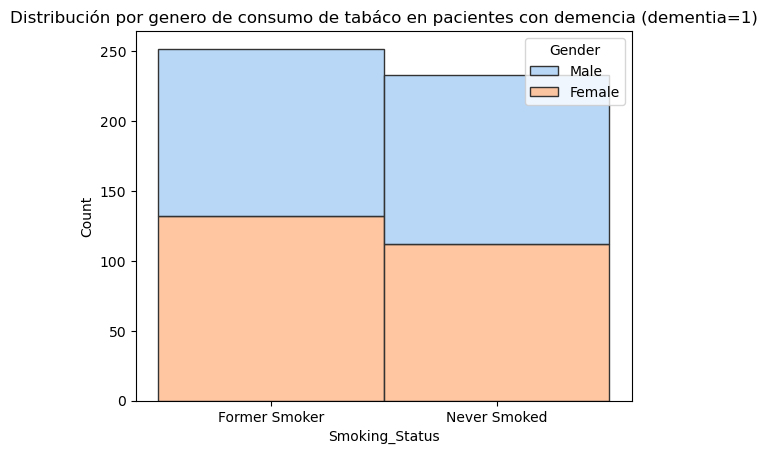

In [29]:
# Filtrar los datos para casos con demencia = 1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

sns.histplot(data=df_dementia_1, x="Smoking_Status", hue="Gender", multiple="stack", palette="pastel", edgecolor="0.2")

plt.title('Distribución por genero de consumo de tabáco en pacientes con demencia (dementia=1)')
plt.show()

Para la muestra de este estudio, dentro del grupo de pacientes con demencia, no se evidencia una notable diferencia entre los que fuman y los que nunca lo han hecho. Del mismo modo se mantienen proporciones similares para los generos masculino y femenino. 

--------------------------------------------------------------------------------------------------------------------------------

___Consumo de medicación a lo largo de la vida___

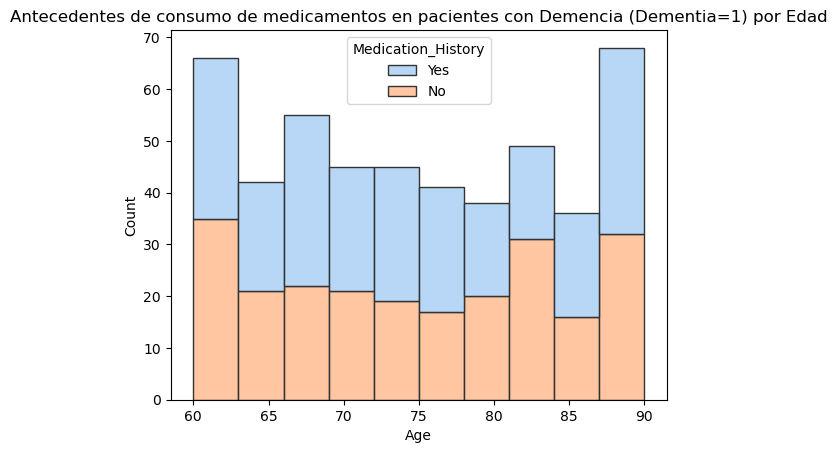

In [30]:
# Filtrar los datos para casos con demencia = 1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

sns.histplot(data=df_dementia_1, x="Age", hue="Medication_History", multiple="stack", palette="pastel", edgecolor="0.2")

plt.title('Antecedentes de consumo de medicamentos en pacientes con Demencia (Dementia=1) por Edad')

plt.show()

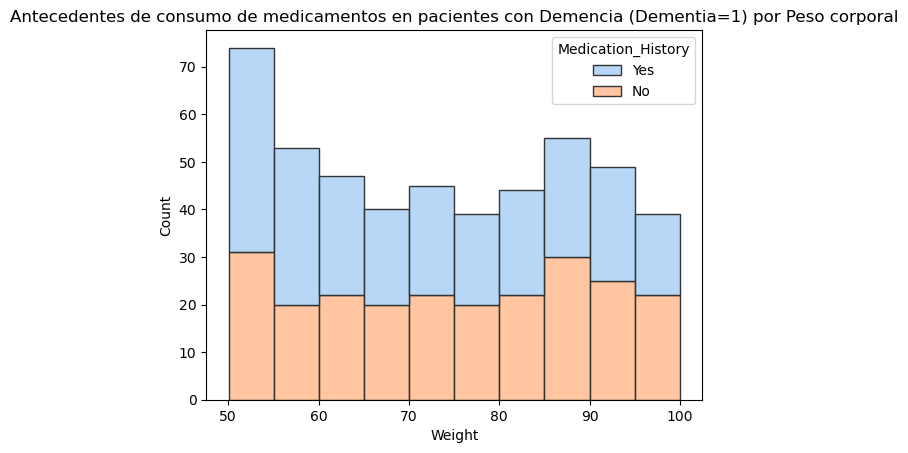

In [31]:
# Filtrar los datos para casos con demencia = 1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

sns.histplot(data=df_dementia_1, x="Weight", hue="Medication_History", multiple="stack", palette="pastel", edgecolor="0.2")

plt.title('Antecedentes de consumo de medicamentos en pacientes con Demencia (Dementia=1) por Peso corporal')

plt.show()

Contrario a lo que comunmente se suele pensar, el análisis revela una tendencia inesperada: los pacientes con un peso más alto muestran una menor incidencia de antecedentes de consumo de medicamentos en comparación con aquellos con un peso más bajo, __y ademas representan un porcentaje menor dentro del conjunto total de pacientes con demencia.__

**____________________________________________________________________________________________________________________________**

<h3 style="text-align:center;font-weight:bold;">SALUD MENTAL</h3>

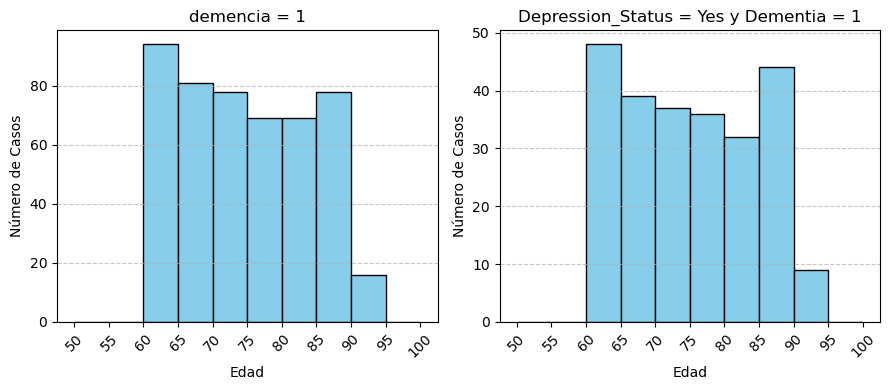

In [32]:
# Filtrar los datos para Dementia = 1
df_dementia_1 = df_dementia[df_dementia['Dementia'] == 1]

# Filtrar los datos para Depression_Status = Yes y Dementia = 1
df_depression_yes_dementia_1 = df_dementia[(df_dementia['Depression_Status'] == 'Yes') & (df_dementia['Dementia'] == 1)]

# Definir los rangos de edad
bins = [i for i in range(50, 101, 5)]  # Crear bins de tamaño 5

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Histograma de edad para Dementia = 1
axs[0].hist(df_dementia_1['Age'], bins=bins, color='skyblue', edgecolor='black')
axs[0].set_title('demencia = 1')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Número de Casos')
axs[0].set_xticks(bins)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma de edad para Depression_Status = Yes y Dementia = 1
axs[1].hist(df_depression_yes_dementia_1['Age'], bins=bins, color='skyblue', edgecolor='black')
axs[1].set_title('Depression_Status = Yes y Dementia = 1')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Número de Casos')
axs[1].set_xticks(bins)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño
plt.tight_layout()
plt.show()

El histograma ubicado en la izquierda indica el numero de casos de pacientes que poseen demencia (dementia=1) para cada rango de edad. Por otro lado, el histograma de la derecha representa el numero de casos de pacientes con __depresión y demencia.__

Notamos que el histograma de la derecha representa aproximadamente la mitad del histograma de la izquierda, lo cual indica que para un mismo valor de edad, alrededor del 50% de las personas estan sufriendo de demencia y depresión al mismo tiempo. 
